In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
pd.set_option('display.max_columns',None)
df_train.head(5)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

# Correlações

In [5]:
df_train_corr = df_train.corr()
df_train_corr

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,0.005852,-0.003362,-0.006252,0.011372,0.006717,-0.000351,-0.000586,-0.000214,-0.011217,-0.013523,0.019805,0.003334,NaN,0.007724,0.004315,NaN,0.005417,0.004539,0.000268,0.012234,-0.004620,NaN,0.003231,0.001924,0.011940,-0.010889,-0.007018,-0.000171,NaN,0.003136,NaN,0.009824,-0.008707,0.001734,-0.003315,0.001971,0.004186,0.005459,-0.000212,-0.011969,-0.016987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002105,NaN,NaN,NaN,NaN,0.011426,NaN,0.003352,NaN,NaN,NaN,0.004508,0.002816,0.048289,-0.004246,-0.004350,0.017135,0.017135,0.017073,0.017073,0.000970,-0.008336,-0.006097,0.006530,0.007925,0.000369,-0.002789,-0.004959,-0.004945,-0.003911,-0.011240,-0.006711,-0.002971,0.012977,0.000160,0.023548,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,-0.032664,0.041738,0.018070,-0.035317,0.983407,0.983630,0.983488,0.080064,-0.055710,0.024364,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,NaN,0.006602,-0.009777,0.013384,-0.005041,0.008562,-0.002133,-0.003706,-0.004674,-0.011169,-0.008567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003576,NaN,NaN,NaN,NaN,0.017423,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.991124,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,0.085643,0.124272,0.130161,0.108850,-0.098682,-0.017227,0.069971,0.048547,0.051289,0.062718,0.044335,0.061549,-0.117804,-0.073321,-0.079831,-0.025616,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.983393,0.983417,0.983552,0.079229,-0.054736,0.024666,0.001360,NaN,-0.010716,0.01303

In [6]:
#Correlações com a nota de matemática
corr_mat = df_train_corr.loc['NU_NOTA_MT']
corr_mat

Unnamed: 0                 0.006530
NU_ANO                          NaN
CO_MUNICIPIO_RESIDENCIA    0.108850
CO_UF_RESIDENCIA           0.107493
NU_IDADE                  -0.061485
                             ...   
Q037                      -0.265249
Q038                      -0.202259
Q039                      -0.019360
Q040                      -0.119997
Q041                      -0.131795
Name: NU_NOTA_MT, Length: 107, dtype: float64

In [7]:
#Correlações mais significativas com a nota de matemática
corr_mat[corr_mat >= 0.25]

TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_MT                1.000000
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_REDACAO           0.379376
Name: NU_NOTA_MT, dtype: float64

In [8]:
df_aux = corr_mat[corr_mat >= 0.25][1:].to_frame().reset_index()
df_aux.rename(columns = {"index": "colunas"}, inplace = True)
df_aux

,colunas,NU_NOTA_MT
0,NU_NOTA_CN,0.584941
1,NU_NOTA_CH,0.529594
2,NU_NOTA_LC,0.494695
3,NU_NOTA_MT,1.000000
4,NU_NOTA_COMP1,0.299402
5,NU_NOTA_COMP2,0.335638
6,NU_NOTA_COMP3,0.350307
7,NU_NOTA_COMP4,0.342282
8,NU_NOTA_COMP5,0.343337
9,NU_NOTA_REDACAO,0.379376


In [9]:
#Lista com as variáveis correlacionadas com a nota de matemática
variaveis_corr_mat = list(df_aux['colunas'])
variaveis_corr_mat

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [10]:
correlacoes = df_train[variaveis_corr_mat].corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.609543,0.545667,0.584941,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938
NU_NOTA_CH,0.609543,1.000000,0.692988,0.529594,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582
NU_NOTA_LC,0.545667,0.692988,1.000000,0.494695,0.430603,0.453262,0.475390,0.467356,0.441696,0.512908
NU_NOTA_MT,0.584941,0.529594,0.494695,1.000000,0.299402,0.335638,0.350307,0.342282,0.343337,0.379376
NU_NOTA_COMP1,0.357672,0.443809,0.430603,0.299402,1.000000,0.756664,0.759452,0.824538,0.558587,0.862744
NU_NOTA_COMP2,0.412894,0.488050,0.453262,0.335638,0.756664,1.000000,0.875447,0.808006,0.655915,0.918278
NU_NOTA_COMP3,0.429447,0.510452,0.475390,0.350307,0.759452,0.875447,1.000000,0.827151,0.664350,0.925813
NU_NOTA_COMP4,0.407747,0.488797,0.467356,0.342282,0.824538,0.808006,0.827151,1.000000,0.635018,0.914505
NU_NOTA_COMP5,0.416349,0.494798,0.441696,0.343337,0.558587,0.655915,0.664350,0.635018,1.000000,0.816248
NU_NOTA_REDACAO,0.459938,0.550582,0.512908,0.379376,0.862744,0.918278,0.925813,0.914505,0.816248,1.000000


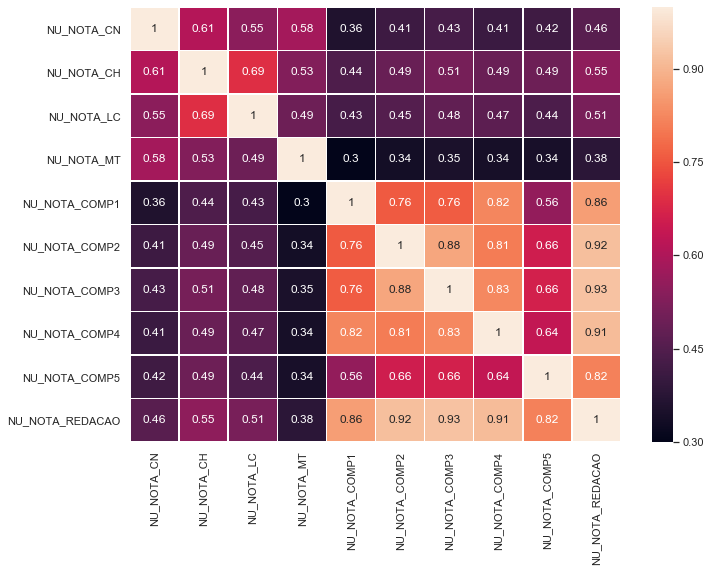

In [11]:
plt.subplots(figsize = (11, 8))
ax = sns.heatmap(correlacoes, annot=True, annot_kws={"size": 12}, linewidths = .5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [12]:
#Variáveis selecionadas que têm correlação significativa com a nota de matemática
variaveis_sel = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

# Retirar linhas nulas e com zero

Optei por remover as linhas nulas ou com zero da variável alvo no data set train. O restante das linhas nulas foram preenchidos com zero.

In [13]:
df_train = df_train[(df_train['NU_NOTA_MT'].notnull()) & (df_train['NU_NOTA_MT'] != 0)]
df_train.fillna(0, inplace = True)

Optei por remover as linhas nulas da variável "Nota da prova de Linguagens e Códigos" no data set teste, uma vez que a prova é feita no mesmo dia que a de matemática, o que significa que o candidato faltou. O restante das linhas nulas foram preenchidos com zero.

In [14]:
df_test = df_test[df_test['NU_NOTA_LC'].notnull()]
df_test.fillna(0, inplace = True)

# Modelo de Regressão Linear

In [15]:
df_train = df_train[variaveis_sel]

In [16]:
df_train.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,436.3,495.4,581.2,520.0,399.4
1,474.5,544.1,599.0,580.0,459.8
5,439.7,583.2,410.9,620.0,364.5
6,420.1,604.2,484.5,560.0,529.2
7,619.6,625.8,611.2,620.0,566.7


In [17]:
y_train = df_train['NU_NOTA_MT']
X_train = df_train.drop(columns = 'NU_NOTA_MT')

In [18]:
X_test = df_test[X_train.columns]
X_test

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
4,592.9,492.6,571.4,320.0
5,414.5,568.5,542.5,560.0
...,...,...,...,...
4570,465.9,602.3,603.9,540.0
4571,398.3,558.2,511.6,500.0
4572,427.6,579.7,471.1,520.0
4573,639.2,643.8,604.9,640.0


In [19]:
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

In [20]:
reg = LinearRegression()

In [21]:
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_test = reg.predict(X_test)

In [23]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer['NU_NOTA_MT'] = np.around(y_pred_test,2)

In [24]:
df_answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,439.90
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,453.17
2,b38a03232f43b11c9d0788abaf060f7366053b6d,569.59
4,715494628a50142ce8cb17191cfe6d0f3cae0934,541.81
5,e656d6bad65c93fb2880f1eba5037008c8e75774,469.55
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,514.46
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,448.93
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,453.42
4573,655fa6306720ff16e825903b5422a46608a77545,603.76


In [25]:
df_answer.to_csv('answer.csv', index=False, header=True)